# Natural language analysis

* Analysis of short texts and their classification to language families

## Data exploration

Dataset – Pater Noster prayers in various languages.

***

#### ❓ Task 1

  * read dataset from file *paternoster.csv* into pandas data frame
  * show dataset sample
  * print number of columns and rows

***

In [1]:
import pandas as pd
d=pd.read_csv('paternoster.csv', sep=';')
d

,lang,class,text
0,Czech,S,"Otče náš, jenž jsi na nebesích, Posvěť se jmén..."
1,Polish,S,"Ojcze nasz, któryś jest w niebie, święć się im..."
2,Deutsch,G,"Vater unser im Himmel, geheiligt werde dein Na..."
3,English,G,"Our Father in heaven, hallowed be your name, y..."
4,French,R,"Notre Père, toi qui es dans les cieux, que tu ..."
5,Dutch,G,"Onze Vader in de hemel, uw naam worde geheilig..."
6,Latin,R,"Pater noster, qui es in caelis, sanctificetur ..."
7,Italian,R,"Padre nostro che sei nei cieli, sia santificat..."
8,Spanish,R,"Padre nuestro que estás en el Cielo, santifica..."
9,Slovak,S,"Otče náš, ktorý si na nebesách, posväť sa meno..."


In [2]:
print(f' cols: {d.shape[1]}, rows: {d.shape[0]}');

 cols: 3, rows: 13


#### Language classes


* **S** – slavic languages
* **R** – roman languages
* **G** – german languages
* **F** – finnish

***

#### ❓ Task 2

  * calculate the number of languages in every class (hint: groupby or value_counts)

***

In [3]:
d.groupby('class')['lang'].count()
d['class'].value_counts()

S    4
R    4
G    4
F    1
Name: class, dtype: int64

## Text preprocessing

***

#### ❓ Task 3

  * create column *proc* with the text from *text* after
    * lower case
    * removing the diacritics
    * replacing any punctuation with single space
    * trimming leading and trailing spaces

***

In [4]:
import numpy as np
import unicodedata
import re

def remove_diac(text: str):
    return ''.join(c for c in unicodedata.normalize('NFD', text)
                   if unicodedata.category(c) != 'Mn')

def preprocess(text: str):
    return remove_diac(re.sub(r"[,.; '-]+",' ',text.strip().lower()))

preprocess_np = np.vectorize(preprocess)

d['proc'] = preprocess_np(d['text'].values)
d

,lang,class,text,proc
0,Czech,S,"Otče náš, jenž jsi na nebesích, Posvěť se jmén...",otce nas jenz jsi na nebesich posvet se jmeno ...
1,Polish,S,"Ojcze nasz, któryś jest w niebie, święć się im...",ojcze nasz ktorys jest w niebie swiec sie imie...
2,Deutsch,G,"Vater unser im Himmel, geheiligt werde dein Na...",vater unser im himmel geheiligt werde dein nam...
3,English,G,"Our Father in heaven, hallowed be your name, y...",our father in heaven hallowed be your name you...
4,French,R,"Notre Père, toi qui es dans les cieux, que tu ...",notre pere toi qui es dans les cieux que tu so...
5,Dutch,G,"Onze Vader in de hemel, uw naam worde geheilig...",onze vader in de hemel uw naam worde geheiligd...
6,Latin,R,"Pater noster, qui es in caelis, sanctificetur ...",pater noster qui es in caelis sanctificetur no...
7,Italian,R,"Padre nostro che sei nei cieli, sia santificat...",padre nostro che sei nei cieli sia santificato...
8,Spanish,R,"Padre nuestro que estás en el Cielo, santifica...",padre nuestro que estas en el cielo santificad...
9,Slovak,S,"Otče náš, ktorý si na nebesách, posväť sa meno...",otce nas ktory si na nebesach posvat sa meno t...


## Vectorization

* trasforming the plain text into cartesian vector space
  * dimensions: symbols – words or ngrams
  * values: frequency of symbol in text

***

#### ❓ Task 4

  * create object *vec* of class CountVectorizer
    * set maximum ftrs count to 1500
    * fit the object with texts from column *proc*
    * print feature names
  * create matrix X with transformed values of *proc*
  * answer the questions:
    * What is the most common word in English prayer?
    * What is the most common bigram in Czech prayer?

***



In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_features = 1500, analyzer='char', ngram_range=(2,2))

vec.fit(d['proc'].values)

#vec.get_feature_names()

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1500, min_df=1,
                ngram_range=(2, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [6]:
X = vec.transform(d['proc'].values)
y = d['class'].values
#pd.DataFrame({'ftr':vec.get_feature_names(), 'nums':X.todense()[3].A1}).sort_values('nums', ascending=False)
#pd.DataFrame({'ftr':vec.get_feature_names(), 'nums':X.todense()[0].A1}).sort_values('nums', ascending=False)

## Hierarchical clustering of languages

* Input:
  * vectorized matrix of frequencies
* Parameters:
  * **affinity** – similarity measure
    * euclidean, l1, l2, manhattan, cosine
  * **linkage** – clustering algorithm
    * **single** – closest members distance
    * **complete** – furtherst members distance
    * **average** – average distance
    * **ward** – minimal combined variance
     
***

#### ❓ Task 5

  * read the code bellow
  * experiment with different 
    * vectorizer parameters (analyzer, ngram_range)
    * similarity measures
    * clustering algorithm
  * find best possible clustering
    * the one most separating for language classes

***  



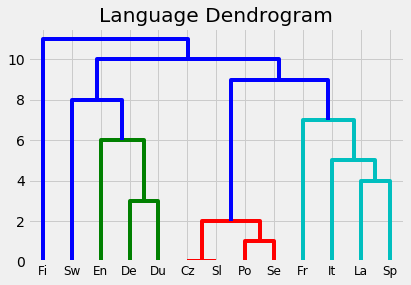

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

wes_rushmore=["#E1BD6D", "#EABE94", "#0B775E", "#35274A", "#F2300F"]

%matplotlib inline

cols={'S': wes_rushmore[4], 'G': wes_rushmore[2], 'R': wes_rushmore[3], 'F': wes_rushmore[0]}

plt.style.use('fivethirtyeight')

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    
clustering = AgglomerativeClustering(n_clusters = 4, affinity='l2', linkage='average').fit(X.toarray())

lng=[s[0:2] for s in d['lang'].values]

plot_dendrogram(clustering, labels=lng, distance_sort='ascending')
plt.title('Language Dendrogram');


## Binary classification

* Model: Multinomial Naive Bayes classifier
* Classes: 
  * **S**lavic languages
  * **G**erman languages
* Training set: Czech and German
* Test set: all the other languages


In [8]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=100)

train_lng = [0,2]

mnb.fit(X[train_lng],y[train_lng])

pred=mnb.predict_proba(X)

## Classification results

***

#### ❓ Task 6

  * read and understand the code bellow
  * evaluate the model performance on the test set
    * mean absolute error
    * predictions plot
  * experiment with parameters
    * vectorizer parameters
    * smoothing alpha
  * answer the questions:
    * does model generaly work?
    * what is the most/least slavic and most german language in the test set?
    * what are the results on roman languages?
    * what about finnish?

***  

### Prediction on training set

MAE TRAIN:  0.18%


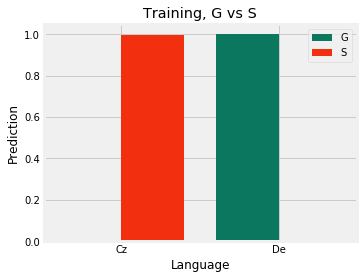

In [9]:
def plot_predictions(pred, idxs, title):

    fig = plt.figure(figsize=[3+len(idxs),4]);
    x=np.arange(len(idxs))
    plt.bar(x-0.2, pred[idxs,0], width=0.4, label = mnb.classes_[0], color=cols[mnb.classes_[0]])
    plt.bar(x+0.2, pred[idxs,1], width=0.4, label = mnb.classes_[1], color=cols[mnb.classes_[1]])
    plt.legend()
    plt.xticks(ticks=x, labels=[lng[i] for i in idxs])
    plt.title(f"{title}, {mnb.classes_[0]} vs {mnb.classes_[1]}")
    plt.xlabel('Language')
    plt.ylabel('Prediction')

    
plot_predictions(pred, idxs=train_lng, title='Training')

from sklearn import metrics

mae_tr = metrics.mean_absolute_error(y[train_lng]==mnb.classes_[0], pred[train_lng,0])
print(f'MAE TRAIN:  {mae_tr:.2%}')

### Prediction on test set

MAE TEST:  4.90%


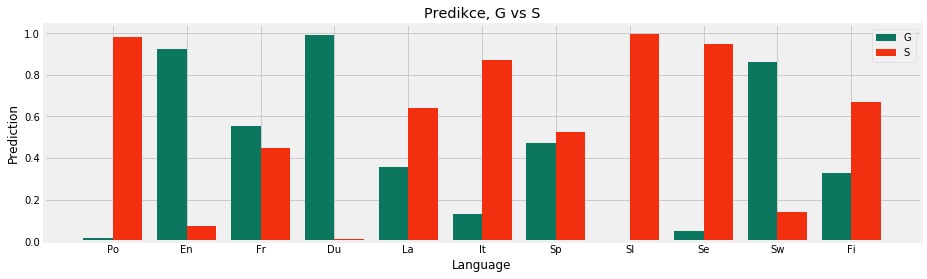

In [10]:
idxs=list(set(range(len(lng)))-set(train_lng))
plot_predictions(pred, idxs=idxs, title='Predikce')
test_lng=d[d['class'].isin(mnb.classes_) & (d.index!=train_lng[0]) &  (d.index !=train_lng[1])].index
mae_te = metrics.mean_absolute_error(y[test_lng]==mnb.classes_[0], pred[test_lng,0])
print(f'MAE TEST:  {mae_te:.2%}')

### Strongest features

* Which features (words or ngrams) most strongly support its language?

***

#### ❓ Task 7

  * read and understand the code bellow  
  * modify the code to answer qustions:
    * what are the strongest slavic, german, roman bigrams?

***  


In [11]:
train_lng=d[d['class'].isin(['S','G'])].index
mnb.fit(X[train_lng],y[train_lng])

df=pd.DataFrame({'ftr':vec.get_feature_names(), mnb.classes_[0]:mnb.feature_log_prob_[0], mnb.classes_[1]:mnb.feature_log_prob_[1]})
df['dif']=df[mnb.classes_[0]]-df[mnb.classes_[1]]
df['odds']=np.exp(df['dif'])
df.sort_values('dif',  inplace=True)
df.tail(20)

,ftr,G,S,dif,odds
91,el,-5.808253,-5.890428,0.082175,1.085646
276,t,-5.746010,-5.832159,0.086149,1.089968
39,ar,-5.799120,-5.890428,0.091308,1.095606
315,ve,-5.746010,-5.841638,0.095627,1.100349
171,l,-5.790070,-5.890428,0.100358,1.105566
14,o,-5.703810,-5.804250,0.100440,1.105658
3,d,-5.703810,-5.804250,0.100440,1.105658
226,om,-5.763402,-5.870625,0.107223,1.113183
111,ge,-5.781102,-5.890428,0.109326,1.115526
304,un,-5.781102,-5.890428,0.109326,1.115526


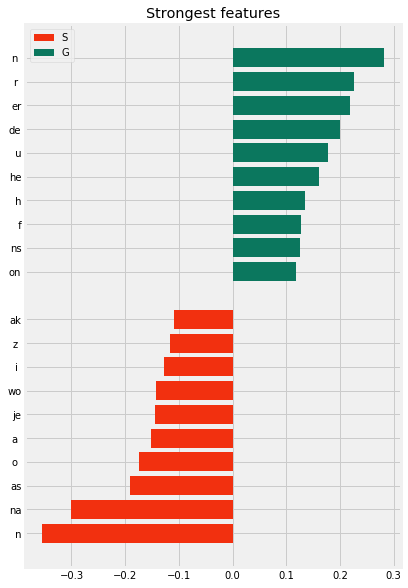

In [12]:
fig = plt.figure(figsize=[6,10]);
n=10
de=pd.concat([df.head(n), df.tail(n)])
x=np.concatenate([np.arange(0,n,dtype=int),np.arange(n+1,2*n+1,dtype=int)])
h1=plt.barh(x[:n],de['dif'].values[0:n],
        color=np.repeat(cols[mnb.classes_[1]],n))
h2=plt.barh(x[n:],de['dif'].values[n:],
        color=np.repeat(cols[mnb.classes_[0]],n))
plt.title('Strongest features')
plt.yticks(ticks=x, labels=de['ftr']);
plt.legend([h1,h2], mnb.classes_[[1,0]]);

## Final tasks

* generalize the model for three classes (S,G,R)
    1. train the model on three representative languages
    2. evaluate the model results
    3. find three languages most
      - nejmenší testovací chyba
    
3. rozhodněte, které skupině jazyků se nejvíce podobá finština
    

MAE TRAIN:  0.87%


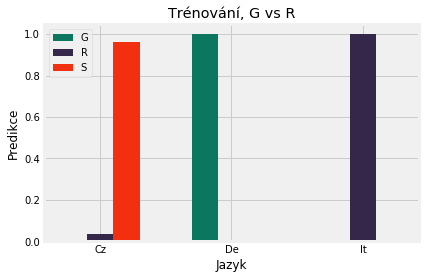

In [13]:
train_lng = [0,2,7]

mnb.fit(X[train_lng],y[train_lng])

pred=mnb.predict_proba(X)

def plot_predictions_3(pred, idxs, title):

    fig = plt.figure(figsize=[3+len(idxs),4]);
    x=np.arange(len(idxs))
    plt.bar(x-0.2, pred[idxs,0], width=0.2, label = mnb.classes_[0], color=cols[mnb.classes_[0]])
    plt.bar(x+0.0, pred[idxs,1], width=0.2, label = mnb.classes_[1], color=cols[mnb.classes_[1]])
    plt.bar(x+0.2, pred[idxs,2], width=0.2, label = mnb.classes_[2], color=cols[mnb.classes_[2]])
    plt.legend()
    plt.xticks(ticks=x, labels=[lng[i] for i in idxs])
    plt.title(f"{title}, {mnb.classes_[0]} vs {mnb.classes_[1]}")
    plt.xlabel('Jazyk')
    plt.ylabel('Predikce')

plot_predictions_3(pred, idxs=train_lng, title='Trénování')

mae_tr=0
for i in range(3):
    mae_tr += metrics.mean_absolute_error(y[train_lng]==mnb.classes_[i], pred[train_lng,i]) / 3
print(f'MAE TRAIN:  {mae_tr:.2%}')

MAE TEST:  10.66%


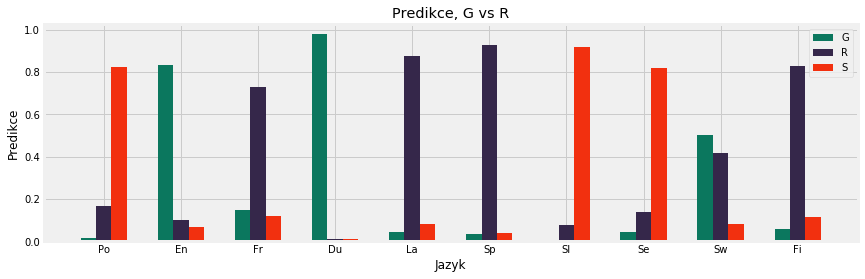

In [14]:
idxs=list(set(range(len(lng)))-set(train_lng))
plot_predictions_3(pred, idxs=idxs, title='Predikce')

test_lng=d[d['class'].isin(mnb.classes_) & (d.index!=train_lng[0]) &  (d.index !=train_lng[1])].index

mae_te=0
for i in range(3):
    mae_te += metrics.mean_absolute_error(y[test_lng]==mnb.classes_[i], pred[test_lng,i]) / 3
print(f'MAE TEST:  {mae_te:.2%}')